In [1]:
pip install -U ultralytics

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U pycocotools

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from PIL import Image
import glob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import json
from pycocotools.coco import COCO
from IPython.display import display
from functions import *

yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/lemur/.cache/torch/hub/ultralytics_yolov5_master
/home/lemur/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
/home/lemur/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
Traceback (most recent call last):
  File "/bin/pip", line 11, in <module>
    load_entry_point('pip==20.0.2', 'console_scripts', 'pip')()
  File "/home/lemur/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 479, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/home/lemur/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 2861, in

In [4]:
coco_images_dir = "./datasets/train2017"
images = glob.glob(coco_images_dir + '/*.jpg')
images_sample = images[:10]
print(images_sample)

['./datasets/train2017/000000094570.jpg', './datasets/train2017/000000204232.jpg', './datasets/train2017/000000427662.jpg', './datasets/train2017/000000174735.jpg', './datasets/train2017/000000304214.jpg', './datasets/train2017/000000235479.jpg', './datasets/train2017/000000209195.jpg', './datasets/train2017/000000177036.jpg', './datasets/train2017/000000349130.jpg', './datasets/train2017/000000161370.jpg']


In [5]:
predictions = yolo_model(images_sample[0])

,xcenter,ycenter,width,height,confidence,class,name
0,501.610199,370.991333,97.675598,282.017365,0.894436,0,person
1,489.797119,260.256226,16.393311,13.950134,0.609582,67,cell phone
2,476.902649,259.380768,18.391174,13.181335,0.264166,67,cell phone


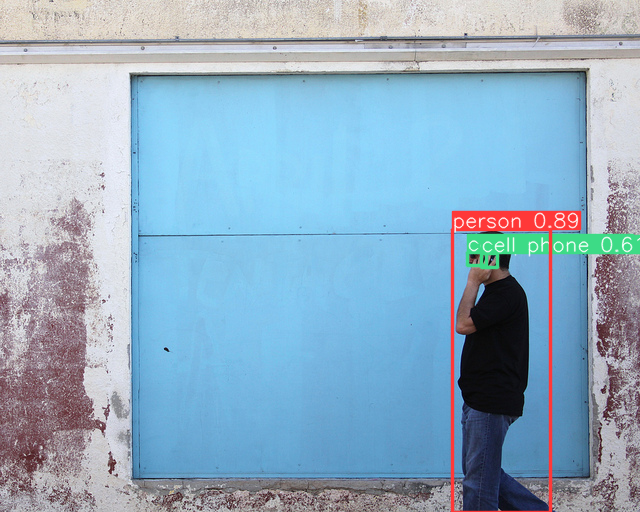

In [6]:
predictions_data = predictions.pandas().xywh
display(predictions_data[0])
predictions.show()

In [7]:
annotation_file = 'datasets/annotations/instances_train2017.json'
with open(annotation_file, 'r') as file:
    annotations = json.load(file)
print(annotations['annotations'][0])

image_id = annotations['annotations'][0]['image_id']
print(image_id)

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
558840


In [8]:
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=15.64s)
creating index...
index created!


In [9]:
image_info = coco.loadImgs(image_id)[0]
image = Image.open(coco_images_dir + '/' + image_info['file_name'])

image_annotation_ids = coco.getAnnIds(imgIds=image_id)
image_annotations = coco.loadAnns(image_annotation_ids)
print(image_annotations)

[{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}, {'segmentation': [[357.57, 210.37, 338.46, 209.92, 327.55, 204.0, 325.27, 164.88, 329.82, 127.12, 326.18, 108.92, 333.01, 104.38, 348.93, 104.38, 358.94, 108.02, 358.03, 130.31]], 'area': 3193.2059999999997, 'iscrowd': 0, 'image_id': 558840, 'bbox': [325.27, 104.38, 33.67, 105.99], 'category_id': 44, 'id': 370268}, {'segmentation': [[170.5, 171.44, 168.85, 149.95, 169.95, 138.37, 172.98, 125.42, 171.33, 114.68, 179.32, 114.4, 178.77, 106.13, 178.22, 92.91, 194.2, 90.98, 192.83, 105.58, 195.86, 117.71, 198.34, 124.32, 200.27, 148.84, 196.13, 145.54, 185.11, 143.61, 176.84, 143.61, 176.84, 146.09, 191.72, 168.68, 185.66, 171.99, 184.83, 169.79, 178.5, 173.09, 174.

In [10]:
objects = []
bounding_boxes = []
for annotation in image_annotations:
    objects.append(coco.loadCats(annotation['category_id'])[0]['name'])
    bounding_boxes.append(annotation['bbox'])

for label in range(len(objects)):
    print(f'{objects[label]}: {bounding_boxes[label]}')

hot dog: [199.84, 200.46, 77.71, 70.88]
bottle: [325.27, 104.38, 33.67, 105.99]
bottle: [168.85, 90.98, 31.42, 88.73]
cup: [1.92, 87.91, 34.95, 175.35]
person: [346.58, 1.07, 292.01, 343.71]
bottle: [239.08, 42.72, 19.88, 76.73]
spoon: [409.93, 215.42, 71.84, 50.12]
person: [0.96, 1.02, 93.08, 160.25]
bottle: [276.39, 13.81, 31.75, 61.57]
dining table: [3.33, 263.96, 359.34, 156.39]
spoon: [413.54, 201.9, 72.79, 56.38]


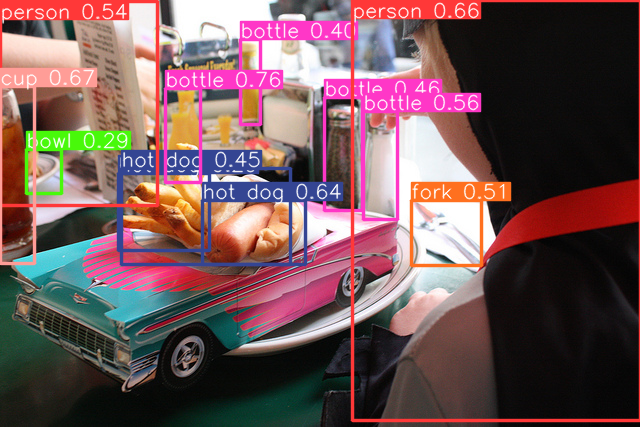

In [11]:
prediction = yolo_model(image)
prediction.show()

In [12]:
predicted_xyxy = prediction.pandas().xyxy[0]
predicted_xywh = prediction.pandas().xywh[0]
predicted_objects = predicted_xyxy['name'].to_list()
predicted_bounding_boxes = pd.DataFrame({
    'xmin': predicted_xyxy['xmin'],
    'ymin': predicted_xyxy['ymin'],
    'width': predicted_xywh['width'],
    'height': predicted_xywh['height']
}).values.tolist()

for label in range(len(objects)):
    print(f'{predicted_objects[label]}: {predicted_bounding_boxes[label]}')

bottle: [165.66192626953125, 88.77175903320312, 34.7098388671875, 93.89486694335938]
cup: [0.05825042724609375, 86.87329864501953, 34.16050338745117, 177.11297607421875]
person: [352.9815673828125, 0.0, 287.0184326171875, 420.7119445800781]
hot dog: [202.267822265625, 200.115234375, 103.43789672851562, 64.09664916992188]
bottle: [363.2650146484375, 111.00762939453125, 34.71539306640625, 108.34878540039062]
person: [0.46826934814453125, 1.827392578125, 156.79388427734375, 203.64993286132812]
fork: [411.90411376953125, 200.32244873046875, 69.74420166015625, 65.13916015625]
bottle: [324.124267578125, 97.23438262939453, 38.277099609375, 112.99150848388672]
hot dog: [121.14820861816406, 168.62095642089844, 168.9326629638672, 95.97303771972656]
bottle: [240.2841796875, 39.25880432128906, 20.20904541015625, 85.53538513183594]
hot dog: [118.4329833984375, 173.5972442626953, 90.94000244140625, 76.89271545410156]


In [13]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(24, 8)

ax[0].imshow(image)

ax[1].imshow(image)
for label in range(len(objects)):
    bbox = bounding_boxes[label]
    label = objects[label]
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)
    ax[1].text(bbox[0], bbox[1] - 10, label, color='r')

ax[2].imshow(image)
for label in range(len(predicted_objects)):
    bbox = predicted_bounding_boxes[label]
    label = predicted_objects[label]
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax[2].add_patch(rect)
    ax[2].text(bbox[0], bbox[1] - 10, label, color='r')

In [14]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(24, 8)

ax[0].imshow(image)

ax[1].imshow(image)
draw_xywh_bounding_boxes(ax[1], bounding_boxes, objects)

ax[2].imshow(image)
draw_xywh_bounding_boxes(ax[2], predicted_bounding_boxes, predicted_objects)

In [15]:
image_id = annotations['annotations'][1]['image_id']
image = load_coco_image(coco, coco_images_dir, image_id)
bounding_boxes, labels = get_xywh_bounding_boxes_and_labels_from_coco(coco, image_id)

prediction = yolo_model(image)
predicted_bounding_boxes, predicted_labels = get_xywh_bounding_boxes_and_labels_from_yolo_prediction(prediction)

In [16]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(24, 8)

ax[0].imshow(image)

ax[1].imshow(image)
draw_xywh_bounding_boxes(ax[1], bounding_boxes, labels)

ax[2].imshow(image)
draw_xywh_bounding_boxes(ax[2], predicted_bounding_boxes, predicted_labels)

In [17]:
for label in range(len(labels)):
    print(f'{labels[label]}: {bounding_boxes[label]}')

hot dog: [234.22, 317.11, 149.39, 38.55]
hot dog: [239.48, 347.87, 160.0, 57.81]
hot dog: [296.65, 388.33, 1.03, 0.0]
hot dog: [251.87, 333.42, 125.94, 22.71]
dining table: [128.24, 192.99, 511.76, 281.33]
bicycle: [0.0, 36.05, 562.4, 443.74]
car: [131.1, 0.0, 508.9, 248.77]
car: [1.08, 1.08, 130.81, 57.3]
cup: [463.29, 202.06, 99.47, 170.41]


In [18]:
bounding_boxes_by_label = {}
for label in range(len(bounding_boxes)):
    if labels[label] not in bounding_boxes_by_label:
        bounding_boxes_by_label[labels[label]] = []
    bounding_boxes_by_label[labels[label]].append(bounding_boxes[label])

for label in bounding_boxes_by_label:
    print(f'{label}: {bounding_boxes_by_label[label]}')

hot dog: [[234.22, 317.11, 149.39, 38.55], [239.48, 347.87, 160.0, 57.81], [296.65, 388.33, 1.03, 0.0], [251.87, 333.42, 125.94, 22.71]]
dining table: [[128.24, 192.99, 511.76, 281.33]]
bicycle: [[0.0, 36.05, 562.4, 443.74]]
car: [[131.1, 0.0, 508.9, 248.77], [1.08, 1.08, 130.81, 57.3]]
cup: [[463.29, 202.06, 99.47, 170.41]]


In [32]:
bounding_boxes_by_label = group_bounding_boxes_by_label(bounding_boxes, labels)
predicted_bounding_boxes_by_label = group_bounding_boxes_by_label(predicted_bounding_boxes, predicted_labels)
results_by_label = get_results_by_label(bounding_boxes_by_label, predicted_bounding_boxes_by_label)

for label in results_by_label:
    print(f'{label}:')
    for result_category in results_by_label[label]:
        print(f'\t{result_category}: {results_by_label[label][result_category]}')

bicycle:
	true positives: [{'bounding_box': [0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], 'iou': 8.588911332323033}, {'bounding_box': [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], 'iou': 1.7465685542466347}]
	false positives: []
	false negatives: []
dining table:
	true positives: [{'bounding_box': [101.45803833007812, 191.42019653320312, 538.5419921875, 287.02191162109375], 'iou': 1.061518810622572}]
	false positives: []
	false negatives: []
cup:
	true positives: [{'bounding_box': [460.35015869140625, 202.52593994140625, 103.6033935546875, 170.3341064453125], 'iou': 1.0225260772471312}]
	false positives: []
	false negatives: []
car:
	true positives: [{'bounding_box': [0.14121246337890625, 0.0, 133.89581298828125, 74.29397583007812], 'iou': 1.262760999381832}, {'bounding_box': [125.5152587890625, 1.8272171020507812, 507.25897216796875, 211.674072265625], 'iou': 1.1882075097135367}]
	false positives: []
	false negatives: []
hot 

In [35]:
image_ids = [i['image_id'] for i in annotations['annotations']]
print(image_ids[:10])

[558840, 200365, 200365, 200365, 200365, 495357, 116061, 16164, 205350, 74]


In [36]:
import random

In [37]:
image_ids_sample = random.sample(image_ids, 16)
print(image_ids_sample)

[433766, 373974, 301730, 575246, 233042, 237515, 569769, 268548, 50470, 575228, 144088, 159436, 99844, 253965, 184275, 372122]


In [40]:
image_paths = [coco_images_dir + '/' + i['file_name'] for i in coco.loadImgs(image_ids_sample)]
print(image_paths)

['./datasets/train2017/000000433766.jpg', './datasets/train2017/000000373974.jpg', './datasets/train2017/000000301730.jpg', './datasets/train2017/000000575246.jpg', './datasets/train2017/000000233042.jpg', './datasets/train2017/000000237515.jpg', './datasets/train2017/000000569769.jpg', './datasets/train2017/000000268548.jpg', './datasets/train2017/000000050470.jpg', './datasets/train2017/000000575228.jpg', './datasets/train2017/000000144088.jpg', './datasets/train2017/000000159436.jpg', './datasets/train2017/000000099844.jpg', './datasets/train2017/000000253965.jpg', './datasets/train2017/000000184275.jpg', './datasets/train2017/000000372122.jpg']


In [51]:
predictions = {image_ids_sample[i]: yolo_model(image_paths[i]) for i in range(len(image_ids_sample))}

{433766: YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x389 1 person
Speed: 4.4ms pre-process, 25.1ms inference, 5.2ms NMS per image at shape (1, 3, 640, 416), 373974: YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x480 6 broccolis
Speed: 6.2ms pre-process, 27.7ms inference, 4.5ms NMS per image at shape (1, 3, 640, 480), 301730: YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 535x640 4 persons, 1 baseball bat, 2 baseball gloves
Speed: 8.2ms pre-process, 28.0ms inference, 7.3ms NMS per image at shape (1, 3, 544, 640), 575246: YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 424x640 2 persons, 4 boats
Speed: 3.7ms pre-process, 22.2ms inference, 9.6ms NMS per image at shape (1, 3, 448, 640), 233042: YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 351x640 13 persons, 1 sports ball
Speed: 4.3ms pre-process, 21.8ms inference, 7.3ms NMS per image at shape (1, 3, 352, 640), 237515: YOLOv5 <class 'models.common.Detect

In [63]:
results = {}
for image_id in predictions:
    bounding_boxes, labels = get_xywh_bounding_boxes_and_labels_from_coco(coco, image_id)
    predicted_bounding_boxes, predicted_labels = get_xywh_bounding_boxes_and_labels_from_yolo_prediction(prediction)
    results_by_label = get_results_by_label(bounding_boxes=bounding_boxes, labels=labels, predicted_bounding_boxes=predicted_bounding_boxes, predicted_labels=predicted_labels)
    results[image_id] = results_by_label

print(results)

{433766: {'bicycle': {'true positives': [], 'false positives': [[0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719]], 'false negatives': []}, 'cup': {'true positives': [], 'false positives': [[460.35015869140625, 202.52593994140625, 103.6033935546875, 170.3341064453125]], 'false negatives': []}, 'dining table': {'true positives': [], 'false positives': [[101.45803833007812, 191.42019653320312, 538.5419921875, 287.02191162109375]], 'false negatives': []}, 'car': {'true positives': [], 'false positives': [[0.14121246337890625, 0.0, 133.89581298828125, 74.29397583007812], [125.5152587890625, 1.8272171020507812, 507.25897216796875, 211.674072265625]], 'false negatives': []}, 'hot dog': {'true positives': [], 'false positives': [[236.56484985351562, 330.8053894042969, 163.01153564453125, 70.80889892578125], [241.9166259765625, 306.3901672363281, 137.52410888671875, 39.42742919921875], [240.593

In [68]:
aggregated_results_by_label = {}
for image_id in results:
    for label in results[image_id]:
        if label not in aggregated_results_by_label:
            aggregated_results_by_label[label] = {
                'true positives': [],
                'false positives': [],
                'false negatives': []
            }

        for result_category in aggregated_results_by_label[label]:
            aggregated_results_by_label[label][result_category] += results[image_id][label][result_category]

for label in aggregated_results_by_label:
    print(f'{label}:')
    for result_category in aggregated_results_by_label[label]:
        print(f'\t{result_category}: {aggregated_results_by_label[label][result_category]}')

bicycle:
	true positives: [{'bounding_box': [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], 'iou': 0.657615889838825}, {'bounding_box': [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], 'iou': 0.6260715674355921}]
	false positives: [[0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], [0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], [0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], [0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515625, 525.572998046875, 426.7641296386719], [0.02020263671875, 293.6392517089844, 148.5592041015625, 183.24737548828125], [106.91744995117188, 3.37353515